In [9]:
import cantera as ct
import math
import numpy as np
import matplotlib.pyplot as plt

In [10]:
gas = ct.Solution('h2o2.yaml')
gas.TPX = 1200, 10*ct.one_atm, 'H2:1, N2:0.1'

s0 = gas.s
h0 = gas.h
p0 = gas.P
T0 = gas.T

In [11]:
mdot = 1
n_points = 200
data = np.zeros((n_points, 4))

In [12]:
for i, p in enumerate(np.linspace(0.01 * p0, 0.99*p0, n_points)):
    gas.SP = s0, p
    v = np.sqrt(2.0*(h0 - gas.h))
    area = mdot / (gas.density * v)
    Ma = v/gas.sound_speed
    data [i, :] = [area, Ma, gas.T/T0, p/p0]

In [13]:
data[:,0] /= min(data[:, 0])

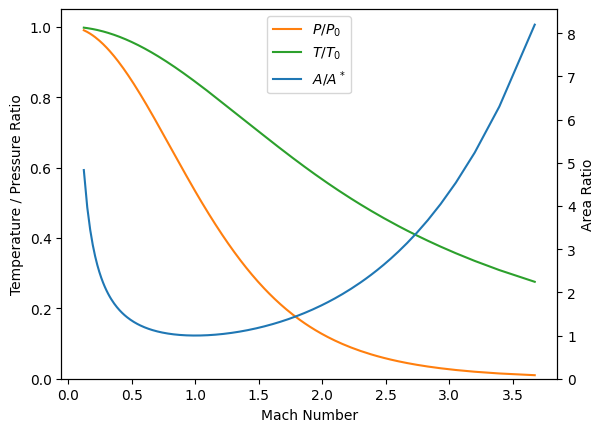

In [14]:
fig, ax = plt.subplots()
h1 = ax.plot(data[:, 1], data[:,3], 'C1', label='$P/P_0$')
h2 = ax.plot(data[:, 1], data[:, 2], 'C2', label='$T/T_0$')
ax.set(xlabel='Mach Number', ylabel='Temperature / Pressure Ratio', ylim=(0, 1.05))
ax2 = ax.twinx()
h3 = ax2.plot(data[:, 1], data[:, 0], label='$A/A^*$')
ax2.set(ylabel='Area Ratio', ylim=(0, None))
ax.legend(handles=[h1[0], h2[0], h3[0]], loc='upper center')
plt.show()